In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import gmaps
import math
import seaborn as sns
import scipy.stats as st
from citipy import citipy
from scipy.stats import linregress

In [2]:
import os
from dotenv import load_dotenv
# Load .env enviroment variables into the notebook
load_dotenv()
# Get the API key from the environment variable and store as Python variable
google_key = os.getenv("google_key")
# Configure gmaps
gmaps.configure(api_key=google_key)

In [3]:
quake_df = pd.read_csv("../data/all_earthquake_data2.zip")

quake_df.head()

,time,latitude,longitude,mag,place
0,1969-12-13T18:59:11.430Z,19.313000,-155.104000,2.78,"17 km S of Fern Forest, Hawaii"
1,1969-12-13T17:55:57.400Z,46.709000,-119.234333,1.60,"13 km SSW of Othello, Washington"
2,1969-12-13T13:03:04.570Z,19.466667,-155.487667,1.94,"26 km W of Volcano, Hawaii"
3,1969-12-13T12:53:50.580Z,19.443167,-155.248833,NaN,"1 km W of Volcano, Hawaii"
4,1969-12-13T10:43:38.000Z,19.304167,-155.210500,2.51,"15 km S of Volcano, Hawaii"


In [4]:
# Store latitude and longitude in locations
quake_df['year'] = pd.DatetimeIndex(quake_df['time']).year
locations = quake_df[["latitude", "longitude"]]
magnitude  = quake_df[['mag']]
quake_df[['year']].astype(float)
quake_df.head()

,time,latitude,longitude,mag,place,year
0,1969-12-13T18:59:11.430Z,19.313000,-155.104000,2.78,"17 km S of Fern Forest, Hawaii",1969
1,1969-12-13T17:55:57.400Z,46.709000,-119.234333,1.60,"13 km SSW of Othello, Washington",1969
2,1969-12-13T13:03:04.570Z,19.466667,-155.487667,1.94,"26 km W of Volcano, Hawaii",1969
3,1969-12-13T12:53:50.580Z,19.443167,-155.248833,NaN,"1 km W of Volcano, Hawaii",1969
4,1969-12-13T10:43:38.000Z,19.304167,-155.210500,2.51,"15 km S of Volcano, Hawaii",1969


In [5]:
# # Plot Heatmap
# fig = gmaps.figure(zoom_level=2, center=[31.9686, -99.9018])



# # Create heat layer
# heat_layer = gmaps.heatmap_layer(locations, weights = quake_df['mag'] > 3,
#                                  dissipating=False, max_intensity=10,
#                                  point_radius=1)


# # Add layer
# fig.add_layer(heat_layer)

# # Display figure
# fig

In [6]:
quake_df['year'] = quake_df['year'].astype(float)
year = quake_df.loc[quake_df['year']]
num_of_quakes_by_yr = quake_df['year'].value_counts()
np.array(['1','2','3']).astype(np.float)
num_of_quakes_by_yr

<ipython-input-6-feb9f4d387dd>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.array(['1','2','3']).astype(np.float)


2020.0    192297
2018.0    188723
2019.0    183415
2014.0    139921
2017.0    134606
2008.0    129320
2015.0    127072
2010.0    126845
2016.0    126595
2004.0    123003
2013.0    118764
2005.0    113412
2011.0    110971
2012.0    109522
2006.0    105501
2003.0    104090
2002.0     99451
1992.0     98341
2007.0     98301
2021.0     93950
2009.0     92061
2001.0     77089
2000.0     76297
1997.0     75361
1993.0     75120
1994.0     73237
1999.0     73050
1998.0     72315
1995.0     72225
1996.0     66105
1986.0     64769
1984.0     62469
1989.0     62091
1990.0     60454
1985.0     59094
1991.0     55425
1983.0     55344
1988.0     46911
1987.0     46523
1982.0     42401
1981.0     38819
1980.0     29391
1979.0     28231
1978.0     21420
1975.0     20377
1977.0     19608
1976.0     17975
1974.0     15139
1973.0      9994
1971.0      8672
1970.0      5657
1972.0      4957
1969.0       400
Name: year, dtype: int64

In [7]:
quake_df['decade'] = quake_df['year'].apply(lambda x: str(x) [:3] + '0s')
quake_df.dtypes

time          object
latitude     float64
longitude    float64
mag          float64
place         object
year         float64
decade        object
dtype: object

In [8]:
seventies = quake_df.loc[(quake_df['decade'] == '1970s') & (quake_df['mag'] >= 3)]
num_of_quakes_70 = seventies.groupby('decade')['decade'].count()
eighties = quake_df.loc[(quake_df['decade'] == '1980s') & (quake_df['mag'] >= 3)]
num_of_quakes_80 = eighties['decade'].value_counts()
nineties = quake_df.loc[(quake_df['decade'] == '1990s') & (quake_df['mag'] >= 3)]
num_of_quakes_90 = nineties['decade'].value_counts()
y2k = quake_df.loc[(quake_df['decade'] == '2000s') & (quake_df['mag'] >= 3)]
num_of_quakes_00 = y2k['decade'].value_counts()
y2k1 = quake_df.loc[(quake_df['decade'] == '2010s') & (quake_df['mag'] >= 3)]
num_of_quakes_10 = y2k1['decade'].value_counts()
y2k2 = quake_df.loc[(quake_df['year'] == 2020) & (quake_df['mag'] >= 3)]
# all_data = quake_df.loc[(quake_df['mag'] >= 3)] & (quake_df['decade'])

print(f'Total Number to Earthquakes in {num_of_quakes_70}')
print(f'Total Number to Earthquakes in {num_of_quakes_80}')
print(f'Total Number to Earthquakes in {num_of_quakes_90}')
print(f'Total Number to Earthquakes in {num_of_quakes_00}')
print(f'Total Number to Earthquakes in {num_of_quakes_10}')

Total Number to Earthquakes in decade
1970s    40968
Name: decade, dtype: int64
Total Number to Earthquakes in 1980s    75568
Name: decade, dtype: int64
Total Number to Earthquakes in 1990s    125440
Name: decade, dtype: int64
Total Number to Earthquakes in 2000s    199869
Name: decade, dtype: int64
Total Number to Earthquakes in 2010s    187015
Name: decade, dtype: int64


In [9]:
num_of_quakes_by_dec = quake_df['decade'].value_counts()
num_of_quakes_by_dec

2010s    1366434
2000s    1018525
1990s     721633
1980s     507812
2020s     286247
1970s     152030
1960s        400
Name: decade, dtype: int64

In [10]:
top10_quakes_all = quake_df.nlargest(10, 'mag')
top10_70s = seventies.nlargest(10, 'mag')
top10_80s = eighties.nlargest(10, 'mag')
top10_90s = nineties.nlargest(10, 'mag')
top10_00s = y2k.nlargest(10, 'mag')
top10_10s = y2k1.nlargest(10, 'mag')

In [11]:
locations = top10_quakes_all[['latitude', 'longitude']]
weights = top10_quakes_all['mag']
fig = gmaps.figure(zoom_level=2, center=[31.9686, -99.9018])
# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights = weights,
                                 dissipating=False, max_intensity=10,
                                 point_radius=3)
# Add layer
fig.add_layer(heat_layer)
# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [12]:
marker_locations = top10_quakes_all[['latitude', 'longitude']]

fig = gmaps.figure(zoom_level=2, center=[31.9686, -99.9018])
markers = gmaps.marker_layer(marker_locations)
fig.add_layer(markers)
fig

Figure(layout=FigureLayout(height='420px'))

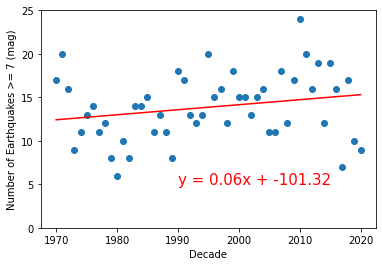

In [17]:
Decademag = quake_df.loc[(quake_df['year'].between(1970,2020)) & (quake_df['mag'] >= 7)]
combine_year = Decademag.groupby('year')
count = combine_year['year'].count()

x_values = count.index
y_values = list(count)
plt.scatter(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.ylim(0,25)
plt.annotate(line_eq,(1990,5),fontsize=15,color="red")
plt.xlabel('Decade')
plt.ylabel('Number of Earthquakes >= 7 (mag)')
plt.show()

In [14]:
count = num_of_quakes_by_dec
count

2010s    1366434
2000s    1018525
1990s     721633
1980s     507812
2020s     286247
1970s     152030
1960s        400
Name: decade, dtype: int64